In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn

data_set = pd.read_csv(r"C:\Users\moham\Desktop\Radouan_Files\Cours_DU_BigData\Detection_De_Fraud\fraud_detection_dataset.csv", sep =";")

data_set["Amount"] = (data_set["Amount"]-data_set["Amount"].mean())/data_set["Amount"].std()
data_set = data_set.rename(columns={'Class': 'Fraud'})
data_set.dropna(inplace=True)

In [2]:
["V{}".format(str(i+1)) for i in range(10)]

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']

In [3]:
data_set["Fraud"].describe()

count    12792.000000
mean         0.004378
std          0.066022
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Fraud, dtype: float64

In [4]:
data_set[data_set["Fraud"]==1].head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353536,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,2.654522,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1.010780,1.0
6108,6986,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.018044,1.0
6329,7519,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.347850,1.0


In [5]:
import sklearn.linear_model as skl
import sklearn.metrics as skm

import matplotlib.pyplot as plt
import seaborn as sn

In [6]:
y = data_set["Fraud"]
X = data_set[["Amount"] + ["V{}".format(str(i+1)) for i in range(15)]]

Model_Reg_logistic = skl.LogisticRegression()
Model_Reg_logistic.fit(X,y)


LogisticRegression()

In [7]:
fraud_predicted = Model_Reg_logistic.predict(X)
score_regression = skm.classification_report(y,fraud_predicted)
print(score_regression)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     12736
         1.0       0.84      0.68      0.75        56

    accuracy                           1.00     12792
   macro avg       0.92      0.84      0.88     12792
weighted avg       1.00      1.00      1.00     12792



In [8]:
MatConf = skm.confusion_matrix(y,fraud_predicted)
MatConf

array([[12729,     7],
       [   18,    38]], dtype=int64)

Text(0.5, 137.22222222222217, 'Prédiction')

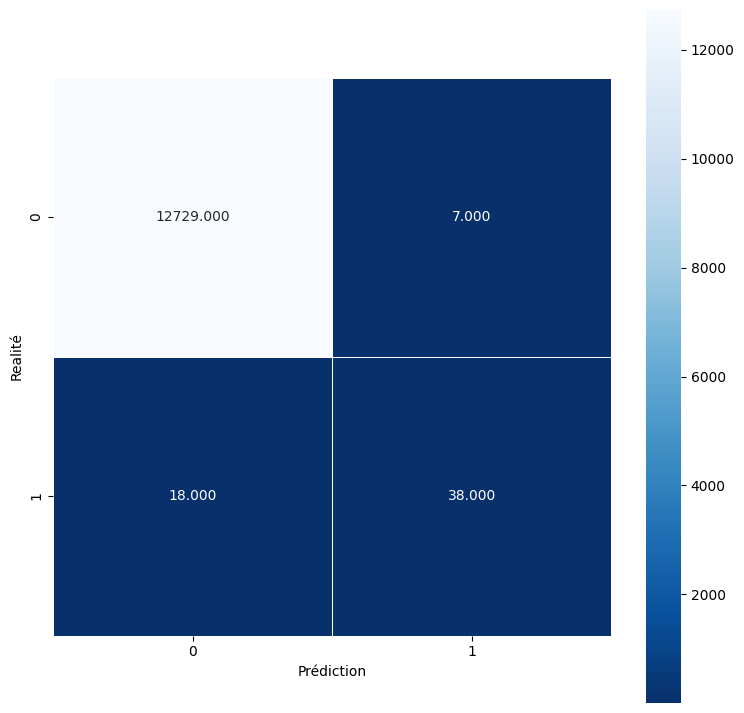

In [9]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(9,9))
sn.heatmap(MatConf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Realité')
plt.xlabel('Prédiction')


In [11]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE

import sklearn.metrics as skm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sn


In [12]:
y = data_set["Fraud"]
X = data_set[["Amount"] + ["V{}".format(str(i+1)) for i in range(20)]]

sm = SMOTE(random_state=10, sampling_strategy = .25)

X_res, y_res = sm.fit_resample(X, y)

XLearn, XTest, yLearn, yTest = train_test_split(X_res,y_res, test_size=0.33, random_state=42)


In [13]:
from sklearn.svm import SVC
{'C': 1, 'gamma': 2, 'kernel': 'linear'}

{'C': 1, 'gamma': 2, 'kernel': 'linear'}

In [14]:
modelSVC = SVC(kernel = 'linear' , gamma = 2, C = 1)

In [15]:
modelSVC = SVC(kernel = 'linear' , gamma = 2, C = 1)
modelSVC.fit(XLearn, yLearn)

SVC(C=1, gamma=2, kernel='linear')

In [16]:
Predicted_fraud = modelSVC.predict(XTest)

In [17]:
MatConf = skm.confusion_matrix(yTest, Predicted_fraud)

Text(0.5, 137.22222222222217, 'Prédiction')

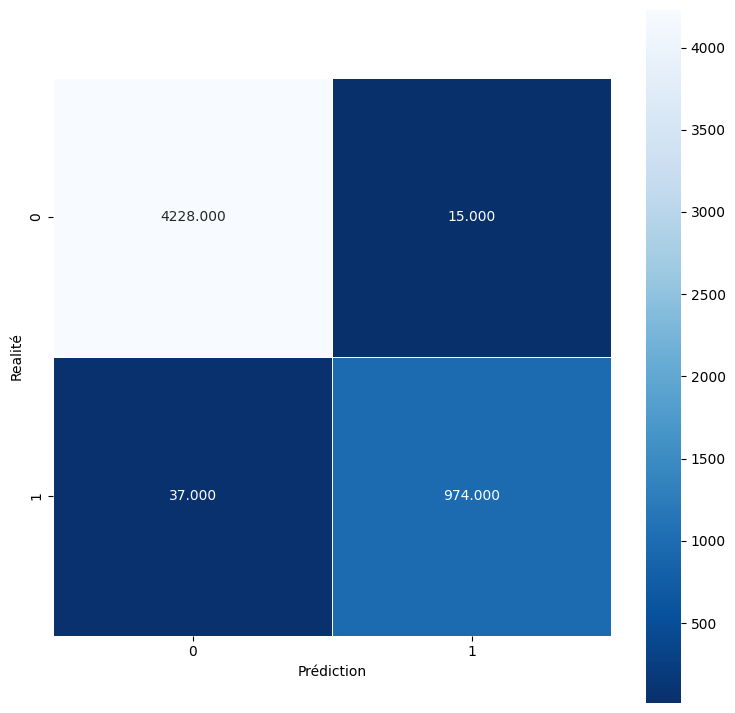

In [18]:

plt.figure(figsize=(9,9))
sn.heatmap(MatConf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Realité')
plt.xlabel('Prédiction')

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1.5, 1.75], 'gamma':[2, 3]}

In [21]:
svc = SVC()

In [22]:

clf = GridSearchCV(svc, parameters)
clf.fit(XLearn, yLearn)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.5, 1.75], 'gamma': [2, 3],
                         'kernel': ('linear', 'rbf')})

In [23]:
clf.cv_results_

{'mean_fit_time': array([0.5576417 , 7.49031291, 0.50503392, 9.15358996, 0.55643539,
        7.54498053, 0.53343883, 7.95150762]),
 'std_fit_time': array([0.06305251, 0.50927779, 0.03613827, 0.9884797 , 0.0513676 ,
        1.02375276, 0.02545221, 0.34667529]),
 'mean_score_time': array([0.02400155, 1.90846376, 0.01920118, 2.24827819, 0.02080288,
        1.82713208, 0.0212019 , 1.97874632]),
 'std_score_time': array([0.0051773 , 0.03316434, 0.00097998, 0.38991057, 0.001471  ,
        0.10816498, 0.00639985, 0.11417341]),
 'param_C': masked_array(data=[1.5, 1.5, 1.5, 1.5, 1.75, 1.75, 1.75, 1.75],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[2, 2, 3, 3, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'rbf', 'linear', 'rbf', 'linear', 

In [24]:
import sklearn.svm as svm

oneclass_svm = svm.OneClassSVM(kernel='linear', gamma=0.001, nu=0.95)

oneclass_svm.fit(XLearn)

fraudPredOneClassSVM = oneclass_svm.predict(XTest)

Pred = np.array(list(map(lambda n: int((n+1)*0.5), list(fraudPredOneClassSVM))))
MatConfOneClassSVM = skm.confusion_matrix(yTest, Pred)


In [25]:
fraudPredOneClassSVM.max()

1

Text(0.5, 1.0, 'One-Class SVM Fraude Detection')

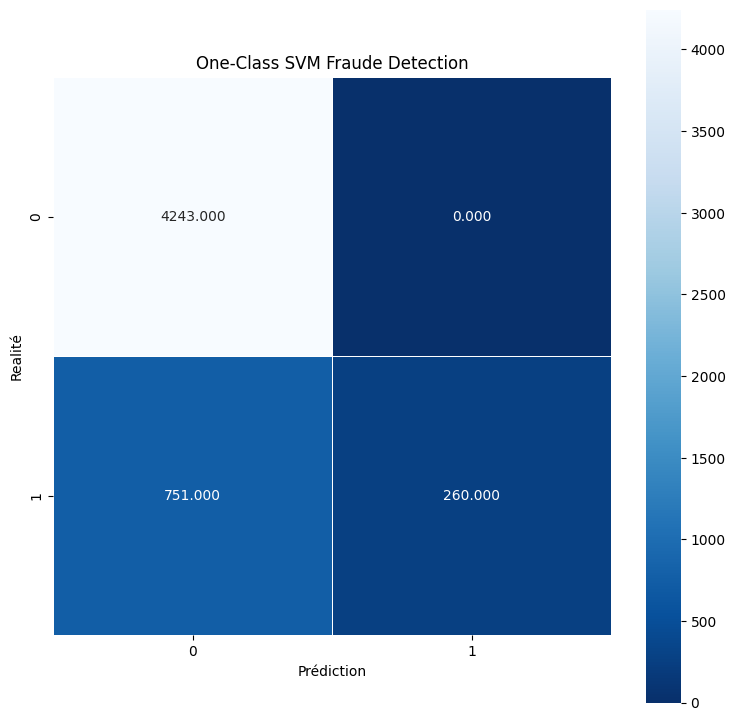

In [26]:
plt.figure(figsize=(9,9))
sn.heatmap(MatConfOneClassSVM, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Realité')
plt.xlabel('Prédiction')
plt.title('One-Class SVM Fraude Detection')

In [27]:
from sklearn.ensemble import IsolationForest

IsolForest = IsolationForest(max_samples=1000, random_state = np.random.RandomState(42))

IsolForest.fit(XLearn)

FraudPredIsoForest = IsolForest.predict(XTest)
Pred = np.array(list(map(lambda n: int((n+1)*0.5), list(FraudPredIsoForest))))
MatConfFraudPredIsoForest = skm.confusion_matrix(yTest, Pred)


Text(0.5, 1.0, 'Isolation Forest Fraud Detection')

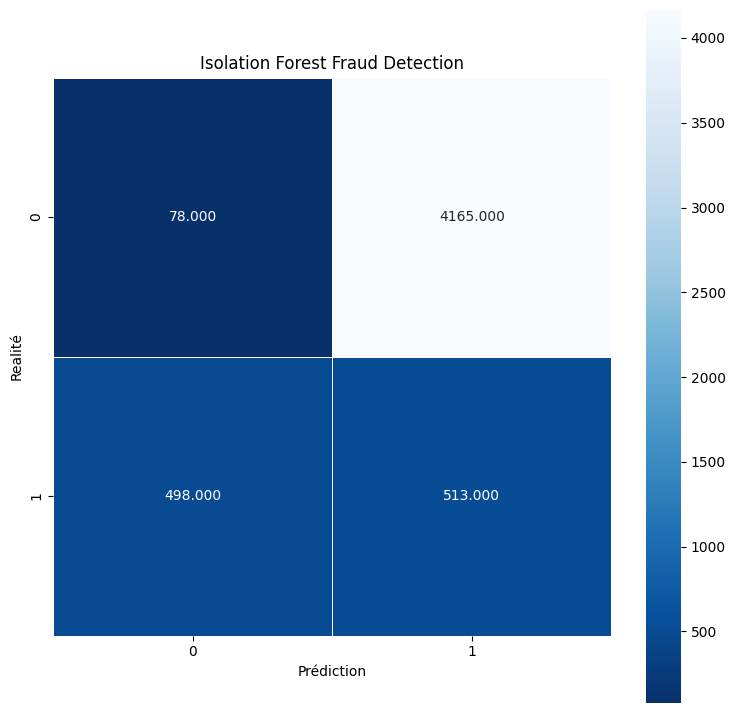

In [28]:
plt.figure(figsize=(9,9))
sn.heatmap(MatConfFraudPredIsoForest, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Realité')
plt.xlabel('Prédiction')
plt.title('Isolation Forest Fraud Detection')